# 14. sklearn

scikit-learn是python中最有名的机器学习库，构建在numpy, scipy, matplotlib之上，使用起来很简单，速度还很快，而且代码开源，可以在github上学习它的源码，学习各种机器学习算法的实现过程。

sklearn中有几个部分
1. clustering包含了常用的聚类算法
2. datasets包含了常见的开源数据集
3. ensemble包含了常用的集成学习算法
4. linear_model包含了常用的线性模型
5. metrics包含了常用的指标
6. naive_bayes包含了朴素贝叶斯相关的算法
7. neural_network包含了神经网络相关的模型
8. svm包含了支持向量机相关的算法
9. tree包含了树模型相关的算法

首先先来演示一个使用sklearn完成分类任务的例子

In [1]:
# License: BSD 3 clause

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

在这里引入我们需要使用的模型

In [3]:
# 引入数据集
from sklearn.datasets import make_moons

In [4]:
# 引入数据预处理工具
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# 引入模型
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
# 引入评价指标
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## 生成数据集
我们生成一个只有两个特征的数据集，所以可以在二维的平面上绘制出来

这个make_moons函数是sklearn.datasets中的函数，可以生成两个半月形的数据点

In [7]:
X, y = make_moons(n_samples = 100, noise = 0.3, random_state=0)

X是数据，包含100个样本，两个特征，y是标记，两类

In [8]:
y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0])

In [9]:
X.shape

(100, 2)

对数据进行可视化，横轴是第一个特征，纵轴是第二个特征，颜色表示类别

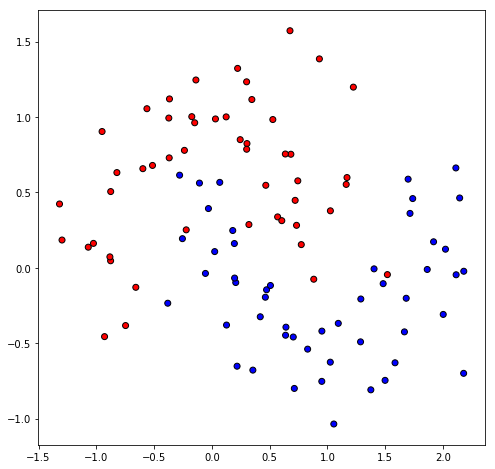

In [10]:
plt.figure(figsize = (8, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cm_bright, edgecolors = 'k')

## 数据预处理

对数据进行标准化处理以及训练集和测试集的划分，随机选取了60%的样本作为训练，40%作为测试，所以我们会使用60个点进行训练，40个点进行测试

In [11]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

X_train表示用来训练的特征数据，y_train是其对应的标记  
X_test表示用来测试的特征数据，y_test是其对应的标记

接下来对数据集进行可视化，不透明的样本为训练样本，半透明的为测试样本

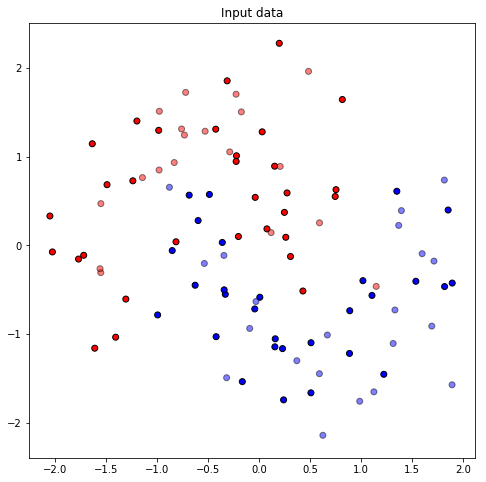

In [12]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize = (8, 8))
plt.title("Input data")

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5, edgecolors='k')

## 选取模型，进行训练与预测

### 对数几率回归

对数几率回归又称逻辑回归，英文是Logistic regression，简称lr，是一个分类算法，常用于二分类任务，也可以处理多分类任务。在scikit-learn中，对数几率回归模型是LogisticRegression这个类，我们创建一个实例后，使用fit方法训练，需要的参数就是训练集的数据和标记。

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

这样模型就训练完成了，接下来是预测

In [14]:
prediction = lr.predict(X_test) # 预测

In [15]:
prediction

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

可以看到，prediction就是模型对那40个测试样本的预测结果，而y_test就是他们的真值

In [16]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

接下来是用各项评价指标来评价模型的预测能力，使用模型的预测值和真值就可以计算出模型的各项指标

In [17]:
# 测试集精度
acc = accuracy_score(prediction, y_test)

# 测试集查准率
precision = precision_score(prediction, y_test)

# 测试集查全率
recall = recall_score(prediction, y_test)

# 测试集f1值
f1 = f1_score(prediction, y_test)

print('对数几率回归在该测试集上的四项指标：')
print('精度:', acc)
print('查准率:', precision)
print('查全率:', recall)
print('f1值:', f1)

对数几率回归在该测试集上的四项指标：
精度: 0.875
查准率: 0.857142857143
查全率: 0.9
f1值: 0.878048780488


然后我们可以使用同样的方法，使用其他的模型来实验

## test 尝试使用其他的模型
### 线性判别分析
请你尝试使用其他的模型，如线性判别分析Linear Discriminant Analysis完成模型的训练以及四项指标的计算

In [18]:
model = LinearDiscriminantAnalysis()

# 模型的训练
# YOUR CODE HERE

# 模型的预测
# YOUR CODE HERE

# 计算四项指标
# YOUR CODE HERE


## 可视化

接下来，我们做一些模型可视化的处理，直观的对比各个模型

In [19]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

编写绘制模型预测结果的函数，这个函数会在图的右下角给出当前模型的预测精度，还会画出模型的决策边界

In [20]:
def plot_model(model, title):
    
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (14, 6))
    
    # 绘制训练集的子图
    plt.subplot(121)
    
    # 绘制决策边界
    plt.contourf(xx, yy, Z, cmap = cm, alpha=.8)

    # 绘制训练集的样本
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # 设置图的上下左右界
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # 设置子图标题
    plt.title("training set")
    
    # 图的右下角写出在当前数据集中的精度
    plt.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score_train).lstrip('0'), size=15, horizontalalignment='right')
    
    plt.subplot(122)
    plt.contourf(xx, yy, Z, cmap = cm, alpha=.8)
    
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("testing set")

    plt.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score_test).lstrip('0'), size=15, horizontalalignment='right')

    plt.suptitle(title)

## 对数几率回归

可以看到在右侧的测试集中，蓝色有三个点被模型判定为红色，红色有两个点被模型判定为蓝色，共5个样本被错误判断，所以精度是35 / 40，也就是87.5%

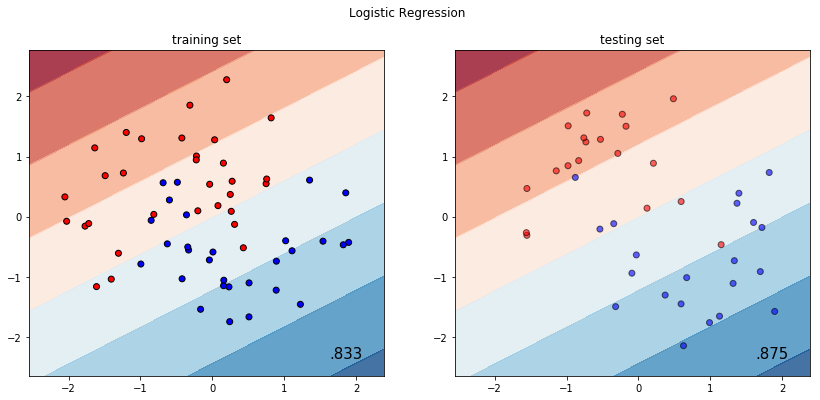

In [21]:
plot_model(LogisticRegression(), 'Logistic Regression')

## 线性判别分析

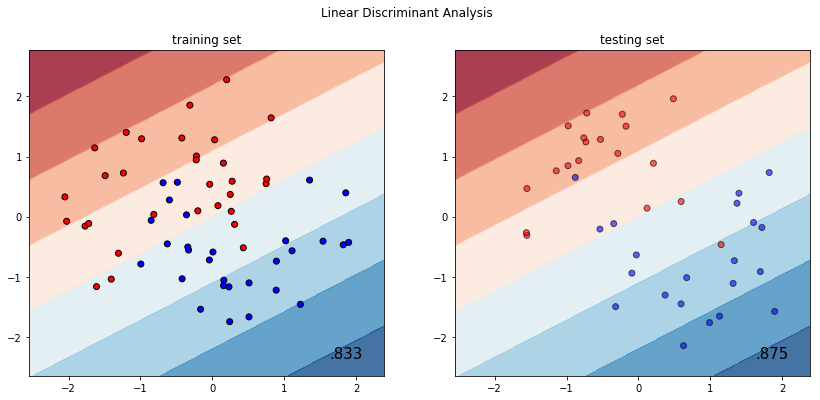

In [22]:
plot_model(LinearDiscriminantAnalysis(), 'Linear Discriminant Analysis')

## 决策树

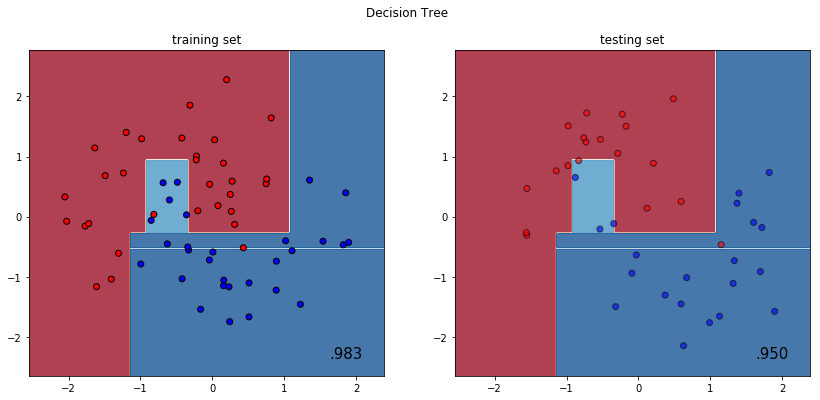

In [23]:
plot_model(DecisionTreeClassifier(max_depth = 5, random_state = 42), 'Decision Tree')

## 多层感知机

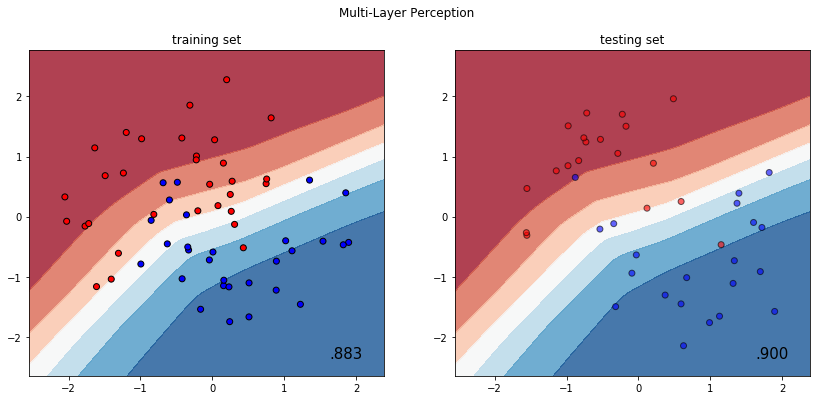

In [24]:
plot_model(MLPClassifier(alpha=1), 'Multi-Layer Perception')

# SVM

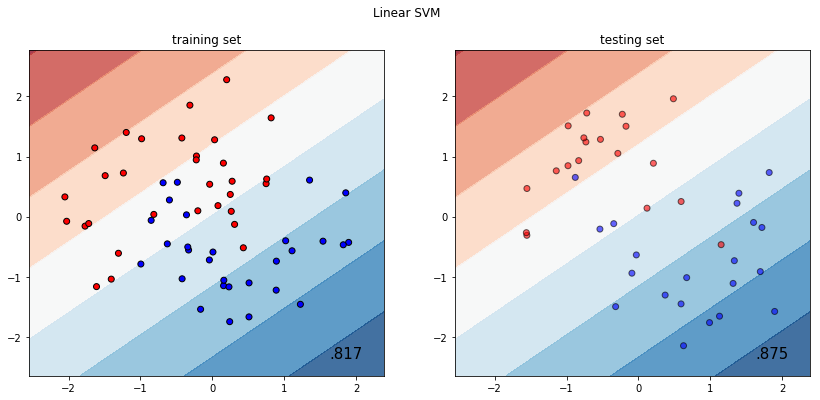

In [25]:
plot_model(SVC(kernel = "linear", C = 0.025, probability = True), 'Linear SVM')